# assignment 05
# Lee Kang Jin 20135619

# import package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color

# Function Summary

# 1. computeMagnitude

 $ derivative \space in \space x \space direction + \space derivative \space in  \space y \space direction$

# 2. computeDirection

 $direction = tan( derivative  \space in  \space x \space direction / \space derivative \space in \space y \space direction )$ 

In [2]:
def computeMagnitude(xker,yker, image):
    boundaryXImage = signal.convolve2d(image, xker, boundary='symm', mode='same')  # convoluation.x
    boundaryYImage = signal.convolve2d(image, yker, boundary='symm', mode='same')  # convoluation.y

    magnitudeImage = np.absolute(boundaryXImage) +np.absolute(boundaryYImage) # abs(x)+ abs(y)
    return magnitudeImage

In [3]:
def computeDirection(xker, yker, image ):
    boundaryXImage = signal.convolve2d( image, xker, boundary='symm', mode='same' )  # convoluation.x
    boundaryYImage = signal.convolve2d( image, yker, boundary='symm', mode='same' )  # convoluation.y

    direction = boundaryXImage

    for i in range(len(boundaryXImage)):
        for j in range(len(boundaryXImage[i])):

            if boundaryYImage[i][j] != 0:
                direction[i][j] = np.tan(direction[i][j]/boundaryYImage[i][j])  # direction = tan(x/y)

            elif boundaryYImage[i][j] is 0:                                     # divide by zero error handle
                if direction[i][j] is 0:                                        #                                    
                    direction[i][j]  = 0                                        # 
                elif direction[i][j] is 1:                                      # 
                    direction[i][j] = np.pi/2                                   # 
                elif direction[i][j] is -1:                                     # 
                    direction[i][j] = -(np.pi/2)                                # 

    return direction

# Main 

## input image
## input gray image

In [4]:
file_image	= 'cau.jpg'
im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)

## define kernel

### x-derivation kernel = [  (-1,1)  ( -1,1) ] 
### y-derivation kernel = [  (-1,-1) (1,1)   ]

### smooth kernel = [ 0.3 ~]   : from silde (normal smooth kernel) 
### smooth kernel2  [0.01~ ]  : i want to check more lower number. 

### my kernel = [ ( 1,0,1 ),( 0,-1,0 ),( 1,0,1) ]) : I want to check surrouding area influence

In [6]:
xker 		= np.asfarray([[-1, 1],[-1, 1]])                                        # Define kernels for compution image gradients
yker        = np.asfarray([[-1,-1],[ 1, 1]])

smoothkerV1   = np.asfarray([[0.3,0.3,0.3],[0.3,0.3,0.3],[0.3,0.3,0.3]])            # Define kernels for smoothing image
smoothkerV2   = np.asfarray([[0.01,0.01,0.01],[0.01,0.01,0.01],[0.01,0.01,0.01]])

myker         = np.asfarray([[1,0,1],[0,-1,0],[1,0,1]])                             # Define my ker -> I want to check the influence of the surrounding area.

In [7]:
size =  computeMagnitude(xker,yker,im_gray) # abs size. 
direction = computeDirection(xker,yker,im_gray) # direction.

# Result of smooth image

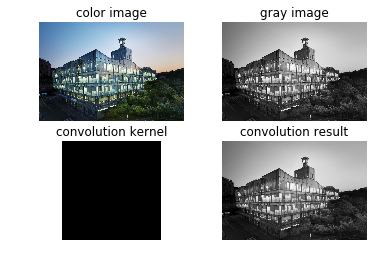

In [13]:
smooth = signal.convolve2d(im_gray, smoothkerV2, boundary='symm', mode='same')

p1 = plt.subplot(2,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('convolution kernel')
plt.imshow(smoothkerV2, cmap='gray')
plt.axis('off')


p4 = plt.subplot(2,2,4)
p4.set_title('convolution result')
plt.imshow(smooth, cmap='gray')
plt.axis('off')

plt.show()

# Result of size image

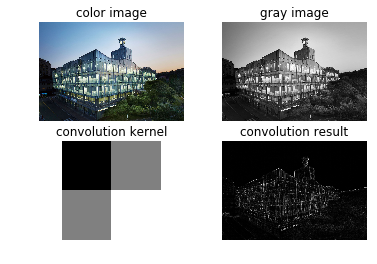

In [10]:
p1 = plt.subplot(2,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('convolution kernel')
plt.imshow(xker+yker, cmap='gray') # using xker and yker
plt.axis('off')


p4 = plt.subplot(2,2,4)
p4.set_title('convolution result')
plt.imshow(size, cmap='gray')   # show abs computation image.
plt.axis('off')

plt.show()

# Result of direction image

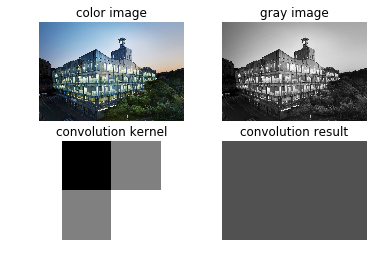

In [11]:
p1 = plt.subplot(2,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('convolution kernel')
plt.imshow(xker+yker, cmap='gray')
plt.axis('off')


p4 = plt.subplot(2,2,4)
p4.set_title('convolution result')
plt.imshow(direction, cmap='gray')
plt.axis('off')

plt.show()

# Result of image using my kernel

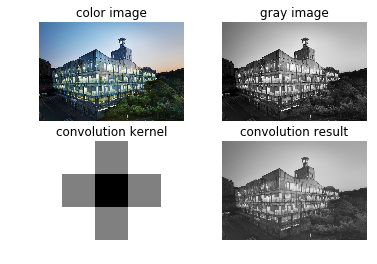

In [14]:
my_image = signal.convolve2d(im_gray, myker, boundary='symm', mode='same')

p1 = plt.subplot(2,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('convolution kernel')
plt.imshow(myker, cmap='gray')
plt.axis('off')


p4 = plt.subplot(2,2,4)
p4.set_title('convolution result')
plt.imshow(my_image, cmap='gray')
plt.axis('off')

plt.show()

# Git address 

\url {https://github.com/LeeKangJin/assignment}